# Intro

placeholder text

## Summary

placeholder text


## Challanges
> Large dataset (>200 cols)

## Table of Contents

1. [Intro]()
2. [So on]()



---



What do I want to do in this notebook?

- Data preprocessing

1. Missing Data Investiagion
    
    1.1 Data Imputation

2. Change Data Types
3. Define & Create Target Variable (churn)



In [1]:
# Import sys, os
import sys
import os

# Change the root folder path
project_root = os.path.abspath("..")
sys.path.append(project_root)

# Import analytical packages
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
from functions.utils import identify_empty_cols

# Change pandas display options to visualize the entire dataframe info
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Data Overview

To run the cell below, you'll need to download a json file with your kaggle credentials. [Here's](https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook/) how you can do it

In [2]:
# Download data from kaggle
data_url = 'https://www.kaggle.com/datasets/hritikesinghrawat/telecom-churn-data?select=telecom_churn_data.csv'
od.download(data_url, data_dir='../data', Force=True)

Skipping, found downloaded files in "../data/telecom-churn-data" (use force=True to force download)


In [3]:
# Read the raw data
df_raw = pd.read_csv('../data/telecom-churn-data/telecom_churn_data.csv')

In [4]:
# Copy the dataframe and display shape
df = df_raw.copy()
df.shape

(99999, 226)

In [5]:
# Check the head
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
# Check the tail
df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,...,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# Data Types

In [8]:
# Check the data types
df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [9]:
# Capture all the 'object' type columns

object_cols = []
for col in df.columns:
    if df[col].dtype == 'O':
        object_cols.append(col)

# Show the columns
df[object_cols].head()


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


Those are obviously meant to represent dates, so let's change their data types to datetime

In [10]:
# Change all the 'object' type columns to date type
for col in object_cols:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='ignore')

# Check if the transformation worked
df[object_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

# Cardinality Analysis

Describe what cardinality is, and how it can be used to discover patterns in datasets and its importance in fitting ML models.

In [11]:
# Check the number of unique values in each column
df.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [12]:
# Let's investigate the columns with few unique values:
low_cardinality_columns = df.columns[df.nunique() < 5]
df[low_cardinality_columns].nunique()

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
night_pck_user_6        2
night_pck_user_7        2
night_pck_user_8        2
night_pck_user_9        2
fb_user_6               2
fb_user_7               2
fb_user_8               2
fb_user_9               2
dtype: int64

In [13]:
df[low_cardinality_columns].head(2)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,...,std_ic_t2o_mou_8,std_ic_t2o_mou_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN


So, what's the takeaway? 

The columns with a single unique value do not hold useful information for us. In this case, they are:

- `circle_id`: a repeated id number 
- a set of columns that indicate the last day of that particular month.
- another set of columns that tracks calls to landlines (which are somehow still a thing).
     
Since they have no analytical purpose and hold no useful information, we might as well drop them

What about the columns with 2 unique values? Those are a binary representation of the label. In less technical terms, they indicate if a customer is a user of a certain product or not.

In [14]:
single_value_columns = df.columns[df.nunique() == 1]
df.drop(single_value_columns, axis=1, inplace=True)

We can also change the datatype of the binary column from `float` to `int`. While not strictly necessary for this particular case, we should see a slightly lower memory usage, slightly faster execution speed, and it follows convention, since most ML libraries expect binary features to be represented as 0 and 1. But we can't change that untill we have dealt with the missing data:

# Missing Data Investigation

Shortly describe the importance of investigating missing data

In [15]:
# Check for missing data
df.isna().mean() * 100

mobile_number                0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_mou_6             3.937039
loc_og_t2m_m

There is a lot of missing data. While some of it is within a somewhat acceptable range (below 5%), some columns have over 70% of their data missing. Instead of just dropping these, we should investigate them further, this could be a mislabeling issue, for example.

# Checking for patterns in missing data

In [16]:
# Capture the columns with over 70% missing values in a list
na_pct = df.isna().mean()*100
missing_values_cols = na_pct[na_pct > 70].index

# Check the data
df[missing_values_cols].head(2).T

,0,1
date_of_last_rech_data_6,2014-06-21 00:00:00,NaT
date_of_last_rech_data_7,2014-07-16 00:00:00,2014-07-25 00:00:00
date_of_last_rech_data_8,2014-08-08 00:00:00,2014-08-10 00:00:00
date_of_last_rech_data_9,NaT,NaT
total_rech_data_6,1.0,NaN
total_rech_data_7,1.0,1.0
total_rech_data_8,1.0,2.0
total_rech_data_9,NaN,NaN
max_rech_data_6,252.0,NaN
max_rech_data_7,252.0,154.0


There is a an apparent pattern in the missing data. The missing values are actually supposed to be 0.

How come?

If we take, for example, the `date_of_last_rech_data_9` for the data points above (which are NaN), we can see that all the other numerical values for the 9th month are also NaN. 

These have to do with how much data recharge each customer did for that particular month. Since the client did not recharge his data for that month, we can imput 0 for all the numeric values here represented as NaN.

For more details on what each acronym mean, check the [Data Dictionary](https://github.com/arthurcab/churn-prediction/blob/main/data/Data%20Dictionary.txt)

It's also very important to understand the patterns in the missing data for the date columns. Take, for example, the second row for `date_of_last_rech_data_6`. The NaN value follows the same pattern as before. The value here is missing beacause the customer did not recharge their data on the 6th month. That is valuable information for our prediction model. Less active customers tend to churn more, so we want to capture that information in our dataset.

Some of the columns are meant to represent binary values: 1 for yes and 0 for no. We can also impute 0 for these columns (`fb_users`, `night_pck_user`)

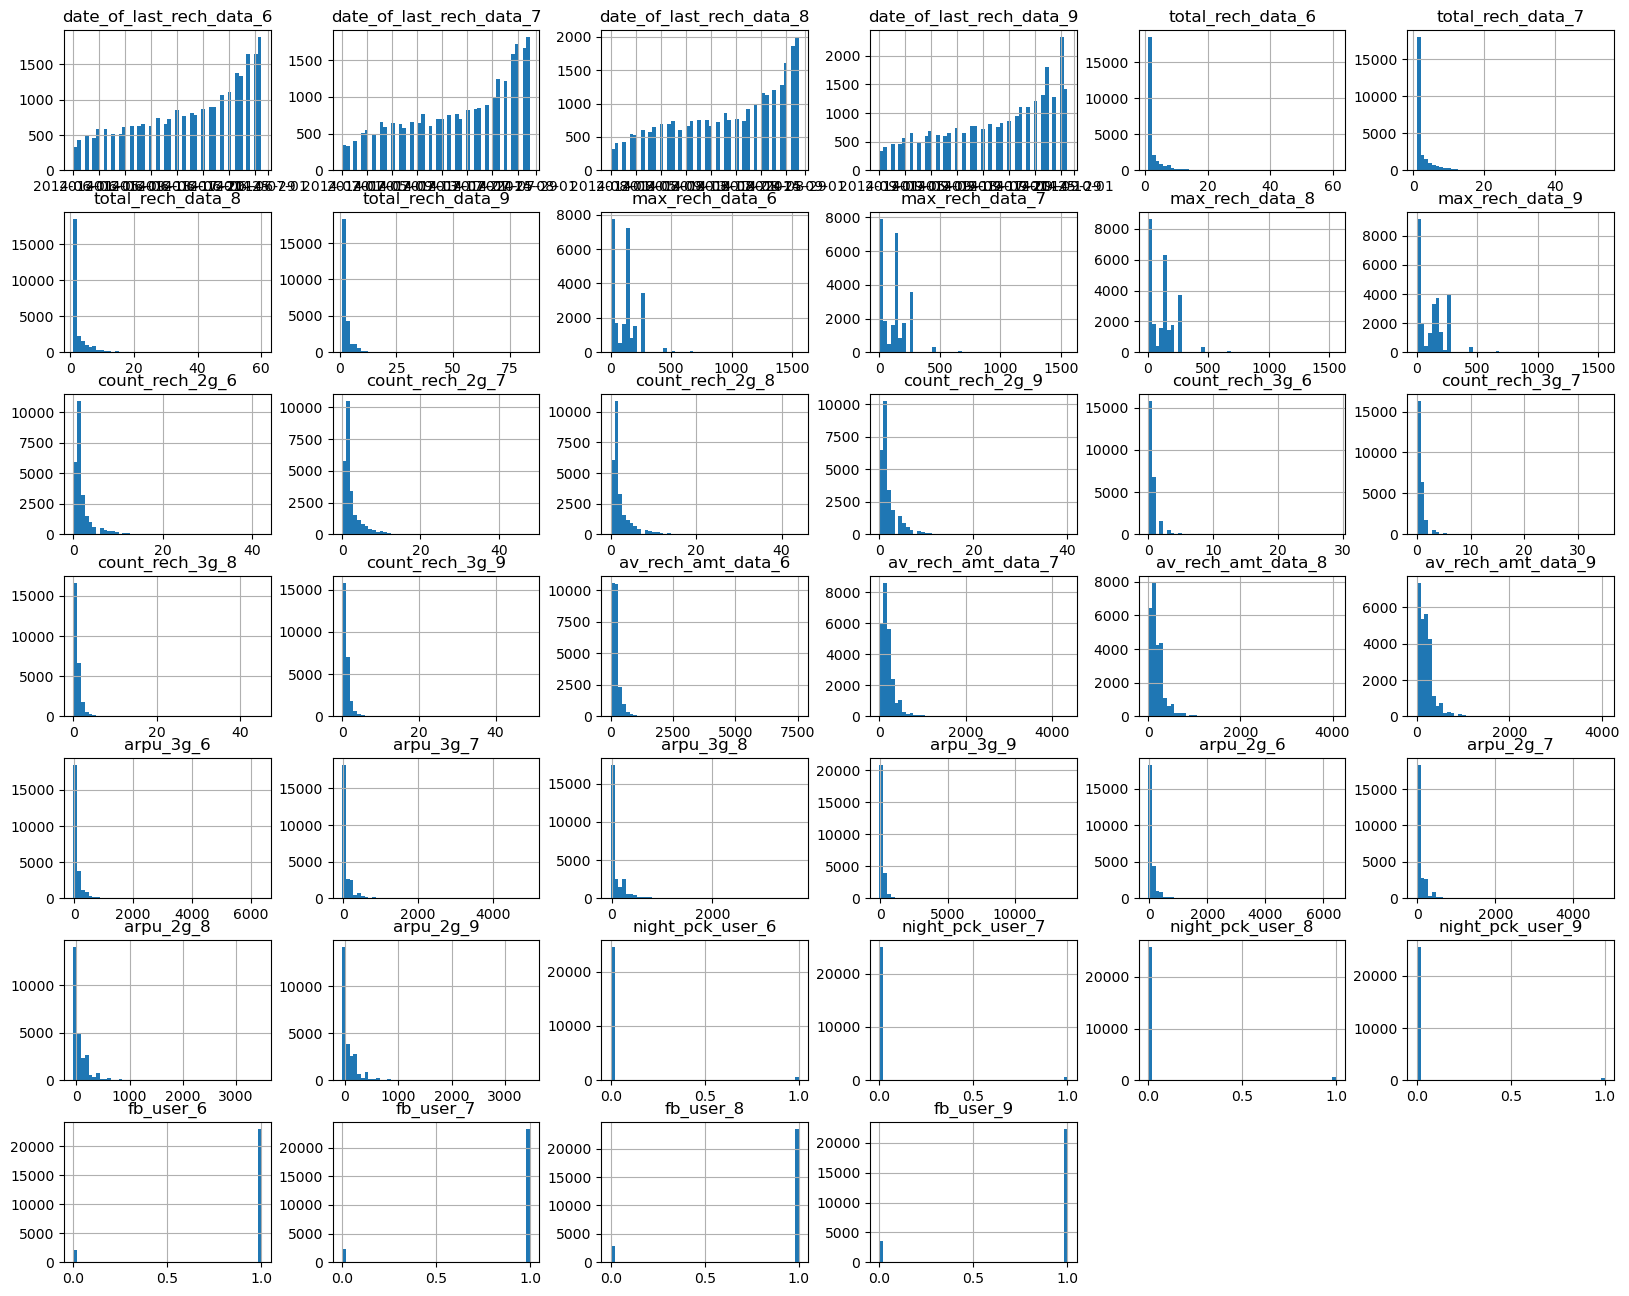

In [17]:
# Let's plot the distribution of the variables with missing data
df[missing_values_cols].hist(bins=50, figsize=(20, 16))
plt.show()

Describe why checking the distribution of the missing data is important:

- model fitting
- data changing
- etc

In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
mobile_number,99999.0,7001207270.387544,7000000074.0,7000606232.5,7001204632.0,7001812030.5,7002410905.0,695669.38629
arpu_6,99999.0,282.987358,-2258.709,93.4115,197.704,371.06,27731.088,328.43977
arpu_7,99999.0,278.536648,-2014.045,86.9805,191.64,365.3445,35145.834,338.156291
arpu_8,99999.0,279.154731,-945.808,84.126,192.08,369.3705,33543.624,344.474791
arpu_9,99999.0,261.645069,-1899.505,62.685,176.849,353.4665,38805.617,341.99863
onnet_mou_6,96062.0,132.395875,0.0,7.38,34.31,118.74,7376.71,297.207406
onnet_mou_7,96140.0,133.670805,0.0,6.66,32.33,115.595,8157.78,308.794148
onnet_mou_8,94621.0,133.018098,0.0,6.46,32.36,115.86,10752.56,308.951589
onnet_mou_9,92254.0,130.302327,0.0,5.33,29.84,112.13,10427.46,308.477668
offnet_mou_6,96062.0,197.935577,0.0,34.73,96.31,231.86,8362.36,316.851613


We can see that our dataset is heavily skewed with some extreme outliers. 

Short description of why it is relevant and what to do with this data.


# Dealing with Missing Data

In this section, I'm going to deal with the missing data by showcasing a few techniques.

Describe the importance of dealing with missing data.

Imputation techniques:
- Mean-Median Imputation
- Arbitrary Value Imputation
- Frequent Category Imputation
- Missing Category Imputation
- Missing Indicator
- Random Sample Imputation
- Complete-case analysis (drop the missing data)
- End of distribution imputation


## 1. Arbitrary data imputation

- Short description of what it is, pros and cons. 

- Why am I using this technique with this particular set of columns?

In [19]:
# Check the data types on the columns with over 70% missing data
df[missing_values_cols].dtypes

date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
date_of_last_rech_data_9    datetime64[ns]
total_rech_data_6                  float64
total_rech_data_7                  float64
total_rech_data_8                  float64
total_rech_data_9                  float64
max_rech_data_6                    float64
max_rech_data_7                    float64
max_rech_data_8                    float64
max_rech_data_9                    float64
count_rech_2g_6                    float64
count_rech_2g_7                    float64
count_rech_2g_8                    float64
count_rech_2g_9                    float64
count_rech_3g_6                    float64
count_rech_3g_7                    float64
count_rech_3g_8                    float64
count_rech_3g_9                    float64
av_rech_amt_data_6                 float64
av_rech_amt_data_7                 float64
av_rech_amt_data_8                 float64
av_rech_amt

For now, we'll select the columns with over 70% missing data, as stated before, there is a pattern to this missingness. (expand on this)

In [20]:
# Capture float type columns with over 70% missing values
na_pct = df.isna().mean() * 100
missing_values_cols = na_pct[na_pct > 70].index

# Select only numeric columns from missing value columns
numeric_cols_missing_values_cols = missing_values_cols.intersection(df.select_dtypes(include=['float64']).columns)

# Impute missing values with 0
df.loc[:, numeric_cols_missing_values_cols] = df.loc[:, numeric_cols_missing_values_cols].fillna(0)

# Verify if the values have been imputed
df[numeric_cols_missing_values_cols].isna().mean() * 100

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
arpu_3g_6             0.0
arpu_3g_7             0.0
arpu_3g_8             0.0
arpu_3g_9             0.0
arpu_2g_6             0.0
arpu_2g_7             0.0
arpu_2g_8             0.0
arpu_2g_9             0.0
night_pck_user_6      0.0
night_pck_user_7      0.0
night_pck_user_8      0.0
night_pck_user_9      0.0
fb_user_6             0.0
fb_user_7             0.0
fb_user_8             0.0
fb_user_9             0.0
dtype: float64

We can now see that all the **numeric columns** with over 70% missing data have now been filled with the assigned value of 0. 

In this case, it makes sense to arbitrarily imput 0 as a value, since it actually represents that the customer did not use a given service that month.

Done! Now, let's move on to the datetime columns

## 2. Missing Indicator

- Missing Indicator

- What is it?

- Why use this technique with the datetime columns

In [21]:
# Check for missing data in the datetime columns
date_columns = df.select_dtypes(include='datetime').columns
df[date_columns].isna().mean()

date_of_last_rech_6         0.016070
date_of_last_rech_7         0.017670
date_of_last_rech_8         0.036220
date_of_last_rech_9         0.047600
date_of_last_rech_data_6    0.748467
date_of_last_rech_data_7    0.744287
date_of_last_rech_data_8    0.736607
date_of_last_rech_data_9    0.740777
dtype: float64

There's plenty of missing data. Just like with the [other columns](), it's safe to assume that the missing data here represent's a customer that has not recharged; therefore was not active, in the represented period.

> **While it might be tempting to just drop these columns, that would be a grave mistake. Patterns in missing data often hold valuable information.**

Now, dealing with missing datetime values is not as simple as dealing with missing numerical or categorical data.

There are several ways of dealing with missing `datetime` values, we can use a **placeholder** value, use **statistical imputation** techniques, simply **drop the values** or **create an indicator column**. All of them with it's pros and cons.

The choice of technique is guided by a few key questions: 

- What is the purpose of the date column? 
- How will it be used (trend analysis, individual predictions, etc?)
- Pattern in missingness: Is there a pattern in the missing data? Can that be used as a predictor variable by our algorithm?

For this case in particular, the missing data represents a period where the customer was innactive. If they didn't recharge their data, there won't be a `date_of_laste_rech_data`. So our best approach here is to **flag** the missing data with an indicator column. Let's do just that:

In [22]:
# Create a list of indicator columns
indicators = [f'{col}_na' for col in date_columns]

indicators

['date_of_last_rech_6_na',
 'date_of_last_rech_7_na',
 'date_of_last_rech_8_na',
 'date_of_last_rech_9_na',
 'date_of_last_rech_data_6_na',
 'date_of_last_rech_data_7_na',
 'date_of_last_rech_data_8_na',
 'date_of_last_rech_data_9_na']

In [23]:
df[indicators] = df[date_columns].isna().astype(int)

In [24]:
# Check the results
df[['date_of_last_rech_data_6', 'date_of_last_rech_data_6_na']].head()

,date_of_last_rech_data_6,date_of_last_rech_data_6_na
0,2014-06-21,0
1,NaT,1
2,NaT,1
3,NaT,1
4,2014-06-04,0


It worked as expected. Now, we've enriched our dataset and we have columns that indicate missing data. That is going to come in handy when we're training our model.

## 3. Complete-case analysis

Placeholder text

In [25]:
# Boolean mask for columns with missing values (except date columns)
mask = (df.isna().any()) & (~df.columns.isin(date_columns)) & (df.isna().mean() * 100 < 5)

# Filter columns based on the mask (select only those with missing values and not in date_columns)
missing_columns = df.columns[mask]

# Select the columns in the filtered list (only columns with missing data, excluding date columns)
df_filtered = df[missing_columns]

df_filtered.head()

,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,...,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24.11,78.68,15.74,99.84,0.0,0.00,0.0,0.00,23.88,74.56,...,0.00,0.00,5.90,0.00,0.00,0.0,1.83,0.00,0.00,0.00
2,11.54,55.24,143.33,220.59,0.0,0.00,0.0,0.00,7.19,28.74,...,21.73,58.34,139.33,306.66,0.21,0.0,0.00,0.85,0.93,3.14
3,99.91,54.39,123.31,109.01,0.0,54.86,0.0,28.09,73.68,34.81,...,1.18,0.00,45.99,105.01,0.59,0.0,0.00,0.00,0.00,0.00
4,50.31,149.44,76.96,91.88,0.0,0.00,0.0,0.00,50.31,149.44,...,0.00,0.00,1.93,0.25,0.00,0.0,0.00,0.00,0.48,0.00


In [26]:
df_filtered.isna().mean() * 100 < 5

onnet_mou_6         True
onnet_mou_7         True
offnet_mou_6        True
offnet_mou_7        True
roam_ic_mou_6       True
roam_ic_mou_7       True
roam_og_mou_6       True
roam_og_mou_7       True
loc_og_t2t_mou_6    True
loc_og_t2t_mou_7    True
loc_og_t2m_mou_6    True
loc_og_t2m_mou_7    True
loc_og_t2f_mou_6    True
loc_og_t2f_mou_7    True
loc_og_t2c_mou_6    True
loc_og_t2c_mou_7    True
loc_og_mou_6        True
loc_og_mou_7        True
std_og_t2t_mou_6    True
std_og_t2t_mou_7    True
std_og_t2m_mou_6    True
std_og_t2m_mou_7    True
std_og_t2f_mou_6    True
std_og_t2f_mou_7    True
std_og_mou_6        True
std_og_mou_7        True
isd_og_mou_6        True
isd_og_mou_7        True
spl_og_mou_6        True
spl_og_mou_7        True
og_others_6         True
og_others_7         True
loc_ic_t2t_mou_6    True
loc_ic_t2t_mou_7    True
loc_ic_t2m_mou_6    True
loc_ic_t2m_mou_7    True
loc_ic_t2f_mou_6    True
loc_ic_t2f_mou_7    True
loc_ic_mou_6        True
loc_ic_mou_7        True


In [27]:
# Cast binary columns as 'int8'
binary_columns = df.columns[df.nunique() == 2]

for col in binary_columns:
    df[col] = df[col].astype('int', errors='raise')

# Check if the conversion worked

df[binary_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   night_pck_user_6             99999 non-null  int64
 1   night_pck_user_7             99999 non-null  int64
 2   night_pck_user_8             99999 non-null  int64
 3   night_pck_user_9             99999 non-null  int64
 4   fb_user_6                    99999 non-null  int64
 5   fb_user_7                    99999 non-null  int64
 6   fb_user_8                    99999 non-null  int64
 7   fb_user_9                    99999 non-null  int64
 8   date_of_last_rech_6_na       99999 non-null  int64
 9   date_of_last_rech_7_na       99999 non-null  int64
 10  date_of_last_rech_8_na       99999 non-null  int64
 11  date_of_last_rech_9_na       99999 non-null  int64
 12  date_of_last_rech_data_6_na  99999 non-null  int64
 13  date_of_last_rech_data_7_na  99999 non-null  i

In [ ]:
df[binary_columns].isna().mean() * 100